In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from Utils.Plot_Helper import plot_1d_data

In [2]:
def plot_metric_against_iterations(data, metric, power=1.0, damping=0.1):
    assert metric in ['rmse', 'nll']
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    ax = plot_1d_data(data, label=None, figsize=(8,6), linewidth=2.5)
    ax.set_xlabel("EP Iterations", fontsize=20)
    if metric == 'rmse':
        ax.set_ylabel("RMSE", fontsize=20)
    else:
        ax.set_ylabel("NLL", fontsize=20)
    ax.set_title(f"Power: {power}, Damping: {damping}", fontsize=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim(1, data.shape[1])
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,3))
    plt.tight_layout()

In [4]:
exp_table = 'UNGM_EXP'
trans = 'TT'
Seeds = np.arange(101, 1101, 100)
con = sqlite3.connect("../Experiments/long_iterations_2.db", detect_types=sqlite3.PARSE_DECLTYPES)
cursor = con.cursor()
rmse_list, nll_list = [], []
for seed in Seeds:
    cursor.execute(f"SELECT RMSE FROM UNGM_EXP WHERE Transform = 'TT' AND Seed = {seed} AND Power = 1.0 AND Damping = 0.1")
    data = cursor.fetchall()
    rmse_list.append(np.array(data).squeeze())
    cursor.execute(f"SELECT NLL FROM UNGM_EXP WHERE Transform = 'TT' AND Seed = {seed} AND Power = 1.0 AND Damping = 0.1")
    data = cursor.fetchall()
    nll_list.append(np.array(data).squeeze())

rmse_list = np.array(rmse_list)
nll_list = np.array(nll_list)

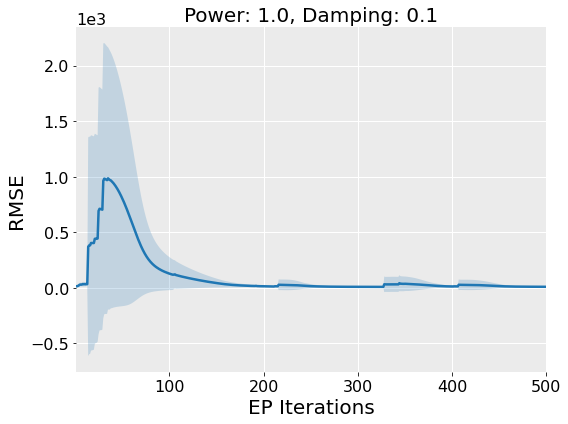

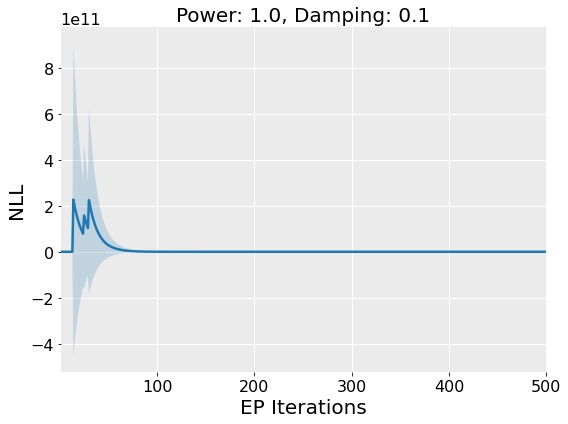

In [5]:
plot_metric_against_iterations(rmse_list, 'rmse')
plt.savefig("figs/Long_iteration_UNGM_TT_RMSE.pdf")
plot_metric_against_iterations(nll_list, 'nll')
plt.savefig("figs/Long_iteration_UNGM_TT_NLL.pdf")